## AdaBoost Comprehensive Guide
<ul>
    <li>To Read Theory of AdaBoost <u><a href='https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/'> Click Here!</a></li>
    <li>To see implementation of AdaBoost <u><a href='https://www.analyticsvidhya.com/blog/2021/06/adaboost-a-brief-introduction-to-ensemble-learning/'> Click Here!</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

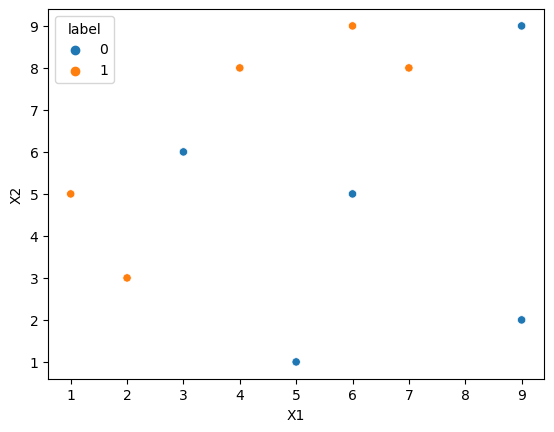

In [3]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

### Step 1 - Calculate Initial Weights

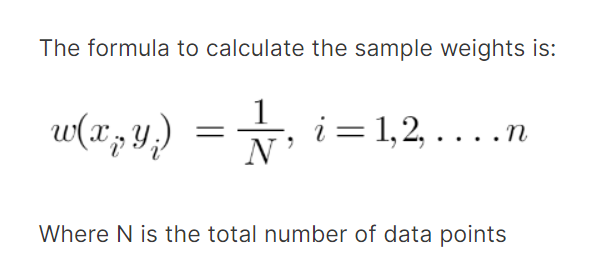

In [4]:
df['initial_weights'] = 1/df.shape[0]
df

,X1,X2,label,initial_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:, 2].values

### Step 2 - Train 1st model

In [8]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

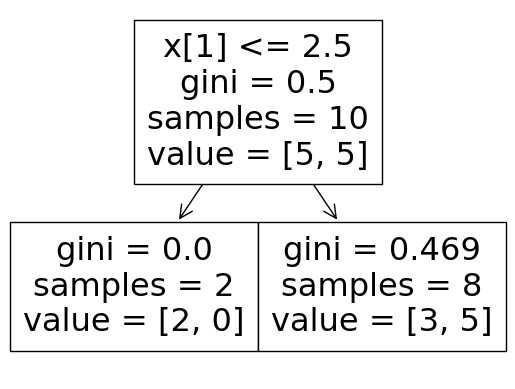

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

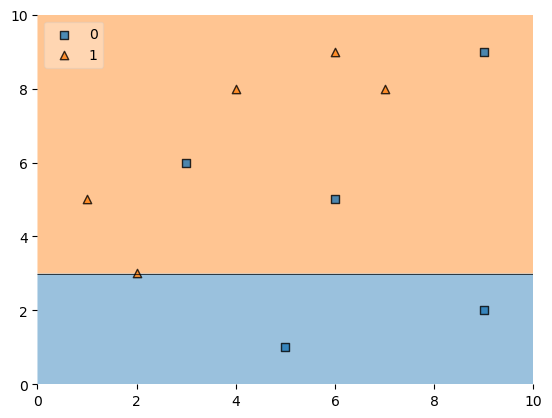

In [10]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [11]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,initial_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


### Step 3 - calculate model Influence


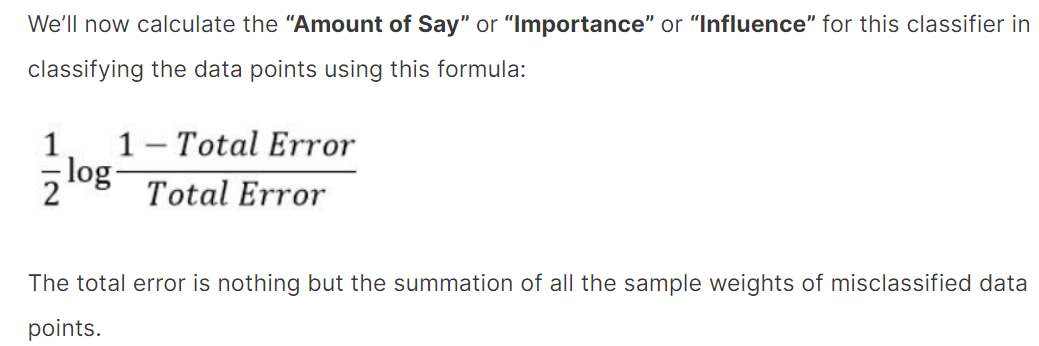

In [12]:
# Calulate Model's Influence in final prediction (alpha)
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error+0.00000000000001)) # added term to avoid dividebyzero error in case of error=0 

In [13]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.4236489301935852

### Step 4 - Update weights

How Sample Weights are Updated :
-> For correctly classified points, weights are decreased
-> For incorrectly classified points, weights are increased
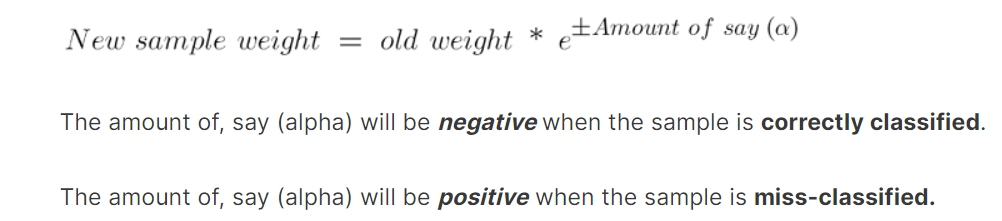

In [14]:
def update_row_weights(row, alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['initial_weights'] * np.exp(-alpha)
  else:
    return row['initial_weights'] * np.exp(alpha)

In [15]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,initial_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [16]:
df['updated_weights'].sum() # The sum of weights of all the samples must be always 1

0.9165153319682015

In [17]:
# Normalizing New Weights in order to get the sum as 1
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,initial_weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [18]:
df['nomalized_weights'].sum()

1.0

### Step 5 - Creating Ranges
Based on the “updated_weights” divide our data points into Ranges.

In [19]:
# Upper Bound
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [20]:
# Lower Bound
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [21]:
df[['X1','X2','label','initial_weights','y_pred','updated_weights','cumsum_upper','cumsum_lower']]

,X1,X2,label,initial_weights,y_pred,updated_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,1.000000,0.928525


### Step 6 - New Dataset with Choosing Rows who require more weightage
### (Up-sampling)

Now, what the algorithm does is selects random numbers from 0-1. Since incorrectly classified records have higher sample weights, the probability of selecting those records is very high.

Suppose the 5 random numbers our algorithm take is 0.38,0.26,0.98,0.40,0.55.

Now we will see where these random numbers fall in the bucket and according to it, we’ll make our new dataset.

In [22]:
# Generates 10 random values b/w upper and lower bounds and 
# chooses the rows in whih each random value belongs

# Return indices of such rows
def create_new_dataset(df):

  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [23]:
index_values = create_new_dataset(df)
index_values

[4, 2, 6, 8, 8, 4, 1, 2, 3, 2]

### Step 7: Repeat Previous Steps

Now this act as our new dataset, and we need to repeat all the above steps i.e.

    1. Assign equal weights to all the data points.
    2. Find the stump that does the best job classifying the new collection of samples by finding their Gini Index and selecting the one with the lowest Gini index.
    3. Calculate the “Amount of Say” and “Total error” to update the previous sample weights.
    4. Normalize the new sample weights.
    5. Iterate through these steps until and unless a low training error is achieved.

hieved.

In [24]:
# Only taking first 4 columns and those upsampled rows
second_df = df.iloc[index_values, [0,1,2,3]]

In [25]:
second_df

,X1,X2,label,initial_weights
4,5,1,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1


### Passing WEIGHTED data to 2nd learner

In [26]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

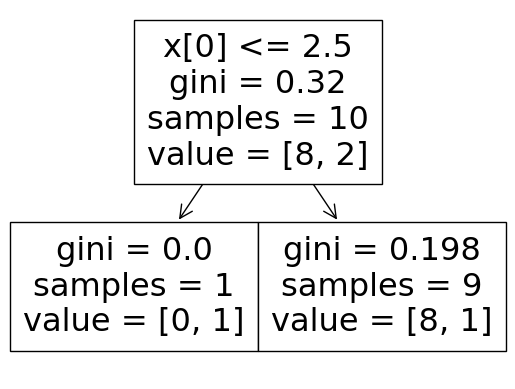

In [27]:
plot_tree(dt2)

<Axes: >

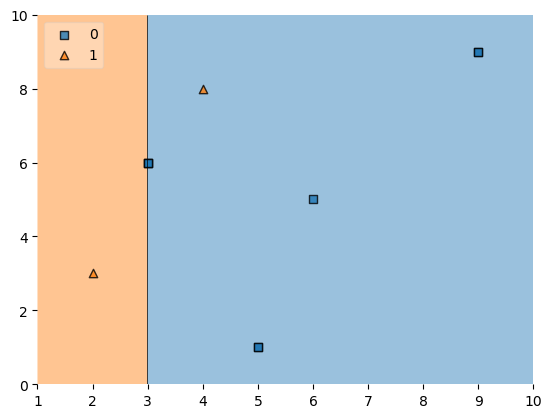

In [28]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [29]:
second_df['y_pred'] = dt2.predict(X)

In [30]:
second_df

,X1,X2,label,initial_weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
2,3,6,0,0.1,0


In [31]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886680596

In [32]:
# Step 4 - Update initial_weights
def update_row_weights(row, alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['initial_weights'] * np.exp(-alpha)
  else:
    return row['initial_weights'] * np.exp(alpha)

In [33]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [34]:
second_df

,X1,X2,label,initial_weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
3,4,8,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622


In [35]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [36]:
second_df

,X1,X2,label,initial_weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,0,0.297427,0.495694
2,3,6,0,0.1,0,0.033622,0.056034


In [37]:
second_df['nomalized_weights'].sum()

1.0

In [38]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [39]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [40]:
second_df[['X1','X2','label','initial_weights','y_pred','nomalized_weights','cumsum_upper','cumsum_lower']]

,X1,X2,label,initial_weights,y_pred,nomalized_weights,cumsum_upper,cumsum_lower
4,5,1,0,0.1,0,0.056034,0.056034,0.000000
2,3,6,0,0.1,0,0.056034,0.112068,0.056034
6,6,5,0,0.1,0,0.056034,0.168102,0.112068
8,9,9,0,0.1,0,0.056034,0.224136,0.168102
8,9,9,0,0.1,0,0.056034,0.280170,0.224136
4,5,1,0,0.1,0,0.056034,0.336204,0.280170
1,2,3,1,0.1,1,0.056034,0.392238,0.336204
2,3,6,0,0.1,0,0.056034,0.448272,0.392238
3,4,8,1,0.1,0,0.495694,0.943966,0.448272
2,3,6,0,0.1,0,0.056034,1.000000,0.943966


In [41]:
index_values = create_new_dataset(second_df)

In [42]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [43]:
third_df

,X1,X2,label,initial_weights
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1


### Passing WEIGHTED data to 3rd learner

In [44]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

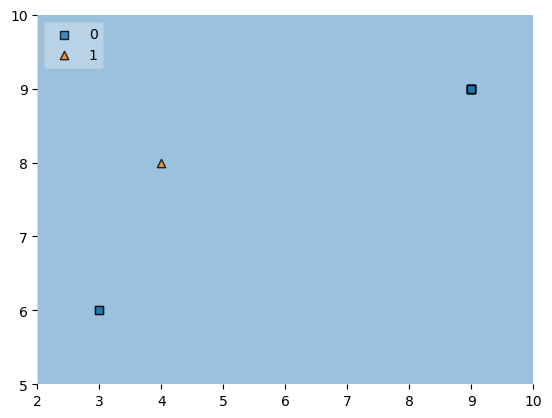

In [45]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [46]:
third_df['y_pred'] = dt3.predict(X)

In [47]:
third_df

,X1,X2,label,initial_weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0


In [48]:
alpha3 = calculate_model_weight(0.1)
alpha3

1.0986122886680596

In [49]:
print(alpha1, alpha2, alpha3)

0.4236489301935852 1.0986122886680596 1.0986122886680596


### Prediction

For a given input, target prediction is determined as,<br>

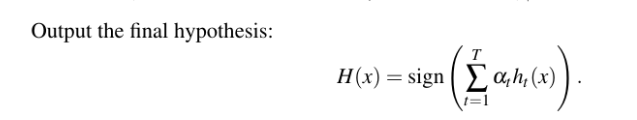

where,<br>
    αᵢ = Influence of i-th learner,<br>
    hᵢ(x) = Individual Prediction of i-th learner<br>
    The `sign` function returns ``-1 if x < 0, 0 if x==0, 1 if x > 0``.


### Test

In [50]:
# For Tree1
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [51]:
# For Tree2
dt2.predict(query)

array([1], dtype=int64)

In [52]:
# For Tree3
dt3.predict(query)

array([0], dtype=int64)

In [53]:
alpha1*1 + alpha2*(1) + alpha3*(1)

2.620873507529704

In [60]:
np.sign(2.62)

1.0

In [55]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [56]:
dt2.predict(query)

array([0], dtype=int64)

In [57]:
dt3.predict(query)

array([0], dtype=int64)

In [58]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-1.773575647142534

In [61]:
np.sign(-1.773575647142534)

-1.0